In [1]:
import numpy as np
import scipy.linalg as sl
import matplotlib.pyplot as plt

class grid:

    def __init__(self, start, end, n_points) -> None:
        self.x_initial = start
        self.x_final = end
        self.N = n_points
        self.dx = (end - start)/n_points

    def x_values(self):
        x = np.linspace(self.x_initial, self.x_final, self.N + 1)
        return x[1:-1]

        
class hydrogen:

    def __init__(self, grid) -> None:
        self.grid = grid

    def V_DVR(self):
        d = 0.17
        a = 1.04
        xe = 1.4

        v = d*((1-np.exp(-a*(self.grid.x_values()-xe)))**2) - d

        return np.diag(v)
    
    def T_DVR(self):
        cons = 1/((918)*(self.grid.dx**2))
        T =  np.zeros((self.grid.N-1, self.grid.N-1))
        
        for i in range(self.grid.N-1):
            for j in range(self.grid.N-1):
                if i == j:
                    T[i,j] = cons*((np.pi**2)/3 - 1/(2*((i+1)**2)))
                else:
                    T[i,j] = cons*((-1)**(i-j))*((2/(i-j)**2) - (2/(i+j)**2))
        
        return T
    
    def H_DVR(self):

        return self.T_DVR() + self.V_DVR()


In [2]:
g = grid(0, 20, 1000)
h = hydrogen(g)
v = h.V_DVR()
v_val = np.diag(v)
x = g.x_values()

In [3]:
H = h.H_DVR()
eigenvalues, eigenvectors = sl.eigh(H)

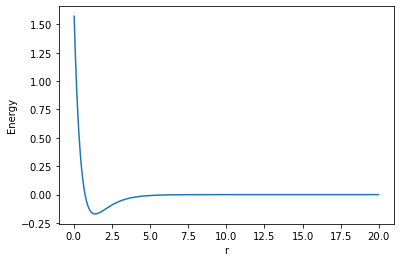

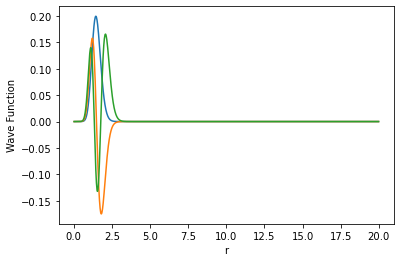

In [82]:
plt.xlabel("r")
plt.ylabel("Energy")
plt.plot(x, v_val)
plt.show()

plt.xlabel("r")
plt.ylabel("Wave Function")
wf = eigenvectors[:,0:3]
plt.plot(x, wf)
plt.show()

# Total Number of bound states

In [5]:
bound_states = eigenvalues[eigenvalues<0]
print("Total number of bound states for H2 is", len(bound_states))

Total number of bound states for H2 is 12


# Time dependence of Wave Function

In [90]:
from matplotlib.animation import FuncAnimation

def wave_func(t):
    time_dependent_part = np.diag(np.exp(-1.j*eigenvalues[0:5]*t))
    wave_function = np.zeros(len(eigenvalues))

    for i in range(5):
        wave_function =+ (eigenvectors[:,0:5] @ time_dependent_part)[:,i]

    return wave_function.real


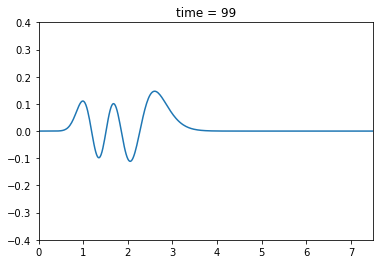

In [92]:
fig, ax = plt.subplots()

def ani_func(t):
    ax.clear()
    ax.set_xlim(0,7.5)
    ax.set_ylim(-0.4,0.4)
    ax.set_title(f"time = {t}")
    ax.plot(x, wave_func(t))

anima = FuncAnimation(fig, ani_func, np.arange(0,100,1))
anima.save('a.mp4')